In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day42-outlier-removal-using-zscore/placement.csv')

In [4]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [5]:
df.isnull().mean()*100

cgpa                    0.0
placement_exam_marks    0.0
placed                  0.0
dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cgpa', ylabel='Density'>

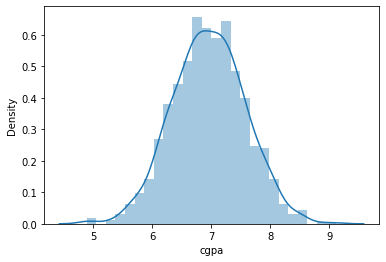

In [10]:
sns.distplot(df['cgpa'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

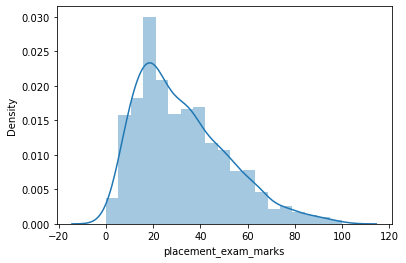

In [11]:
sns.distplot(df['placement_exam_marks'])#skewed

In [15]:
print("mean val of cgpa = ",df['cgpa'].mean())
print("std dev of cgpa = ",df['cgpa'].std())
print("max val = ",df['cgpa'].max())
print("min val = ",df['cgpa'].min())

mean val of cgpa =  6.96124
std dev of cgpa =  0.6158978751323896
max val =  9.12
min val =  4.89


In [18]:
#upper and lower limits
# mean+3*std and mean-3*std
print('highest  =',df['cgpa'].mean() + 3*df['cgpa'].std())
print('lowest  =',df['cgpa'].mean() - 3*df['cgpa'].std())

highest  = 8.808933625397168
lowest  = 5.113546374602832


In [21]:
#finding outliers
df[(df['cgpa']>8.80) | (df['cgpa']<5.11)] # 5 outliers

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [22]:
#trimming
new_df=df[(df['cgpa']<8.80) & (df['cgpa']>5.11)]

In [23]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [24]:
#z_score
#z = (x – μ) / σ
df['cgpa_zscore']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [25]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [26]:
df[df['cgpa_zscore']>3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [27]:
df[df['cgpa_zscore']<-3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [28]:
new_df=df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [29]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


In [30]:
#capping
up_lim=df['cgpa'].mean() + 3*df['cgpa'].std()
lw_lim=df['cgpa'].mean() - 3*df['cgpa'].std()

In [31]:
up_lim

8.808933625397168

In [32]:
lw_lim

5.113546374602832

In [34]:
df['cgpa']=np.where(
    df['cgpa']>up_lim,
    up_lim,
    np.where(
        df['cgpa']<lw_lim,
        lw_lim,
        df['cgpa']
    )
)

In [36]:
df.shape

(1000, 4)